In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/cleaned_dataset.csv")
cleaned_df = df.copy()
print(cleaned_df.head())
cleaned_df.columns

   _STATE  GENHLTH  HLTHPLN1  CVDINFR4  CVDCRHD4  CVDSTRK3  CHCSCNCR  \
0    22.0      4.0       2.0       2.0       2.0       2.0       2.0   
1    31.0      1.0       1.0       2.0       2.0       1.0       2.0   
2    11.0      1.0       1.0       2.0       2.0       2.0       2.0   
3    66.0      3.0       2.0       2.0       2.0       2.0       2.0   
4    20.0      2.0       2.0       2.0       2.0       2.0       2.0   

   CHCOCNCR  ADDEPEV2  CHCKIDNY  ...  _AGE_G  _BMI5CAT  _EDUCAG  _INCOMG  \
0       2.0       2.0       2.0  ...     5.0       4.0      2.0      2.0   
1       2.0       1.0       2.0  ...     6.0       2.0      2.0      1.0   
2       2.0       2.0       2.0  ...     3.0       4.0      2.0     -1.0   
3       2.0       2.0       2.0  ...     5.0       2.0      3.0      1.0   
4       2.0       2.0       2.0  ...     3.0       2.0      2.0      3.0   

   _SMOKER3  _TOTINDA  PHYSHLTH_30_day_range  MENTHLTH_30_day_range  \
0       2.0       2.0                  

Index(['_STATE', 'GENHLTH', 'HLTHPLN1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX',
       'MARITAL', 'QLACTLM2', 'USENOW3', 'EXERANY2', 'PNEUVAC3', '_RFHLTH',
       '_ASTHMS1', '_DRDXAR1', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG',
       '_SMOKER3', '_TOTINDA', 'PHYSHLTH_30_day_range',
       'MENTHLTH_30_day_range', 'ALCDAY5_last_30_days', 'month_year_datetime'],
      dtype='object')

<Axes: xlabel='DIABETE3'>

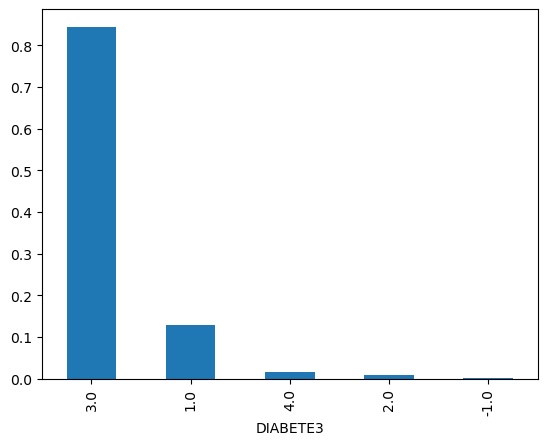

In [4]:
# Plot the distribution of the DIABETE3 column
cleaned_df["DIABETE3"].value_counts(normalize=True).plot(kind="bar")

In [7]:
# Get numeric columns for correlation
numeric_columns = cleaned_df.select_dtypes(include="number").columns.to_list()

# Correlation matrix
correlation_matrix = cleaned_df[numeric_columns].corr()
print(correlation_matrix)

                         _STATE   GENHLTH  HLTHPLN1  CVDINFR4  CVDCRHD4  \
_STATE                 1.000000  0.015312  0.003430  0.000366 -0.001006   
GENHLTH                0.015312  1.000000  0.045535 -0.184952 -0.194827   
HLTHPLN1               0.003430  0.045535  1.000000  0.022948  0.032479   
CVDINFR4               0.000366 -0.184952  0.022948  1.000000  0.379988   
CVDCRHD4              -0.001006 -0.194827  0.032479  0.379988  1.000000   
CVDSTRK3               0.002954 -0.156431  0.019854  0.205946  0.176733   
CHCSCNCR               0.023878 -0.044726  0.054403  0.077218  0.091455   
CHCOCNCR               0.016229 -0.130970  0.040960  0.080754  0.084532   
ADDEPEV2              -0.006931 -0.220865 -0.022132  0.072086  0.079646   
CHCKIDNY               0.008984 -0.135978  0.010698  0.113373  0.122298   
DIABETE3              -0.002984 -0.251645  0.029634  0.131596  0.134530   
SEX                   -0.001656  0.014250 -0.031856  0.058884  0.040060   
MARITAL               -0.

In [51]:
for column in numeric_columns:
    correlation_matrix = cleaned_df["DIABETE3"].corr(cleaned_df[column])
    if abs(correlation_matrix) > 0.3:
        print(f"Moderate or Strong correlation between DIABETE3 and {column}: {correlation_matrix}")

Moderate or Strong correlation between DIABETE3 and DIABETE3: 1.0


In [52]:
cleaned_df.columns

Index(['_STATE', 'GENHLTH', 'HLTHPLN1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX',
       'MARITAL', 'QLACTLM2', 'USENOW3', 'EXERANY2', 'PNEUVAC3', '_RFHLTH',
       '_ASTHMS1', '_DRDXAR1', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG',
       '_SMOKER3', '_TOTINDA', 'PHYSHLTH_30_day_range',
       'MENTHLTH_30_day_range', 'ALCDAY5_last_30_days', 'month_year_datetime'],
      dtype='object')

Reviewing the correlation results DIABETE3 has no moderate, strong, or perfect correlation between any of the remaining columns from the combined and filtered dataset.

The remaining columns while many may be comorbidity conditions, the majority are not indicative of lifestyle. Most of the columns from the original dataset that address lifestyle, such as dietary, exercise, doctors, etc do not exist across all 5 years.

Determination that the survey results over multiple years does not provide an adequate amount of information to preceed with this data.

Will shift to a dataset that uses the same source but is only using 2015.

In [48]:
df = pd.read_csv("datasets/diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_binary_2015 = df.copy()
print(diabetes_binary_2015.head())
diabetes_binary_2015.shape


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

(253680, 22)

In [50]:
diabetes_correlation_matrix = diabetes_binary_2015.corr()
print(diabetes_correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

In [53]:
diabetes_binary_2015.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')